In [14]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('FoulingData(random).csv')
print(df.head())

  Treatment  Barnacle Abundance  Mussel Abundance  \
0       NaN                 0.0               0.0   
1       NaN                25.0               0.0   
2       NaN                 0.0               0.0   
3       NaN                75.0               0.0   
4       NaN                 0.0               0.0   

   Limpet (Slipper snail) Abundance  Filamentous Algae Abundance  
0                               0.0                          0.0  
1                              10.0                          0.0  
2                               0.0                          0.0  
3                              10.0                         10.0  
4                               0.0                          0.0  


In [18]:
# Define the columns to analyze and the treatment groups
columns_to_analyze = [
    'Barnacle Abundance', 'Mussel Abundance', 'Limpet (Slipper snail) Abundance', 'Filamentous Algae Abundance'
]
treatment_groups = [
    'S:2:S', 'S:4:S', 'S:8:S', 'S:2:L', 'S:4:L', 'S:8:L', 
    'L:2:S', 'L:4:S', 'L:8:S', 'L:2:L', 'L:4:L', 'L:8:L', 
    'S:CONTROL', 'L:CONTROL'
]
group_column = 'Treatment'  # Replace with your treatment group column name

# Initialize a list to store all results
results_list = []

# Loop through each treatment group
for treatment_group in treatment_groups:
    # Filter the DataFrame for the current treatment group
    filtered_data = df[df[group_column] == treatment_group]

    # Loop through each column and calculate statistics
    for column in columns_to_analyze:
        if column not in filtered_data:  # Skip if column doesn't exist
            print(f"Warning: Column '{column}' does not exist in the DataFrame. Skipping...")
            continue

        data = filtered_data[column]
        N = data.count()
        if N == 0:  # Handle empty or missing data
            mean = std_dev = se = np.nan
        else:
            mean = np.mean(data)
            std_dev = np.std(data, ddof=1)  # Sample standard deviation
            se = std_dev / np.sqrt(N)  # Standard error (SE)

        # Append the results for this column and treatment group
        results_list.append({
            'Treatment Group': treatment_group,
            'Column': column,
            'Mean': mean,
            'Standard Deviation': std_dev,
            'Standard Error': se,
            'Sample Size (N)': N
        })

# Convert all results into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
display(results_df)
#print(results_df)
results_df.to_csv('foulinganalysis.csv', index=False)

,Treatment Group,Column,Mean,Standard Deviation,Standard Error,Sample Size (N)
0,S:2:S,Barnacle Abundance,0.555556,2.357023,0.555556,18
1,S:2:S,Mussel Abundance,21.111111,27.200538,6.411228,18
2,S:2:S,Limpet (Slipper snail) Abundance,15.000000,23.577157,5.557189,18
3,S:2:S,Filamentous Algae Abundance,5.833333,2.572479,0.606339,18
4,S:4:S,Barnacle Abundance,1.176471,4.850713,1.176471,17
5,S:4:S,Mussel Abundance,11.764706,21.646389,5.250021,17
6,S:4:S,Limpet (Slipper snail) Abundance,0.000000,0.000000,0.000000,17
7,S:4:S,Filamentous Algae Abundance,9.117647,12.149498,2.946686,17
8,S:8:S,Barnacle Abundance,3.823529,4.517124,1.095564,17
9,S:8:S,Mussel Abundance,22.058824,25.003676,6.064282,17


/var/folders/13/zq42zct966b4dh1h5wfdbjh80000gn/T/ipykernel_78271/3475137750.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data['Treatment Group'] = pd.Categorical(column_data['Treatment Group'], categories=custom_order, ordered=True)


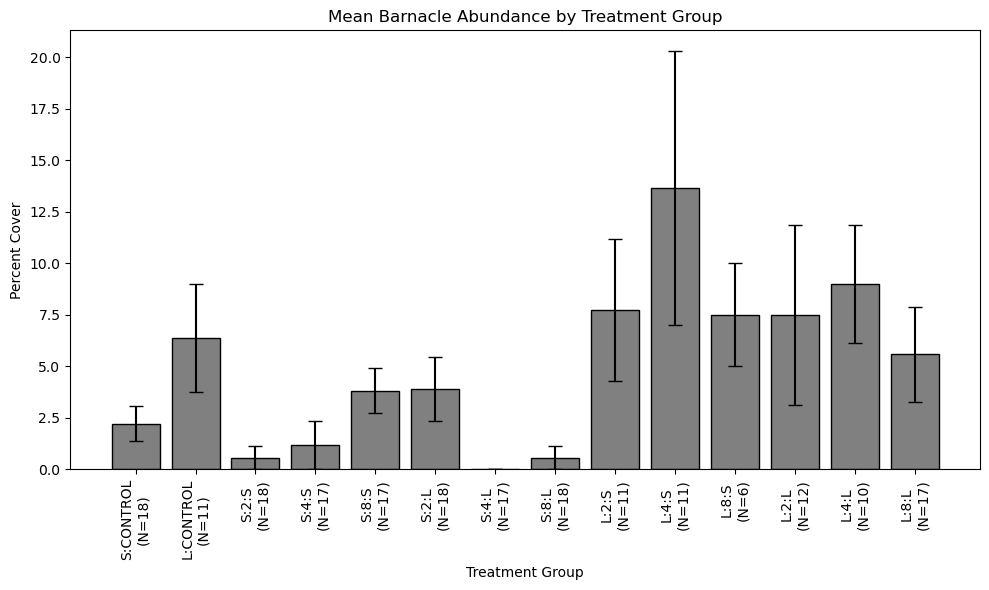

/var/folders/13/zq42zct966b4dh1h5wfdbjh80000gn/T/ipykernel_78271/3475137750.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data['Treatment Group'] = pd.Categorical(column_data['Treatment Group'], categories=custom_order, ordered=True)


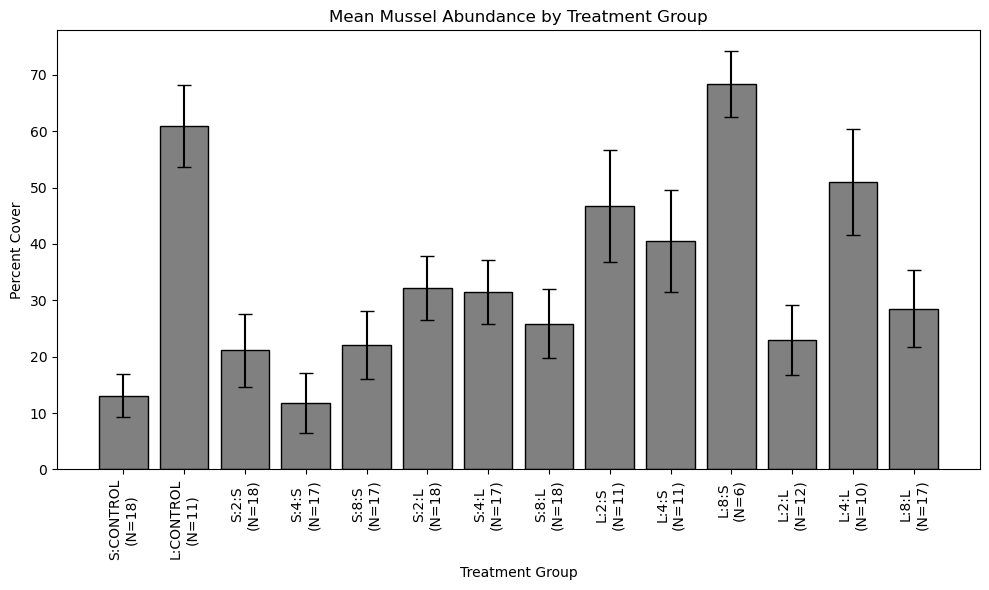

/var/folders/13/zq42zct966b4dh1h5wfdbjh80000gn/T/ipykernel_78271/3475137750.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data['Treatment Group'] = pd.Categorical(column_data['Treatment Group'], categories=custom_order, ordered=True)


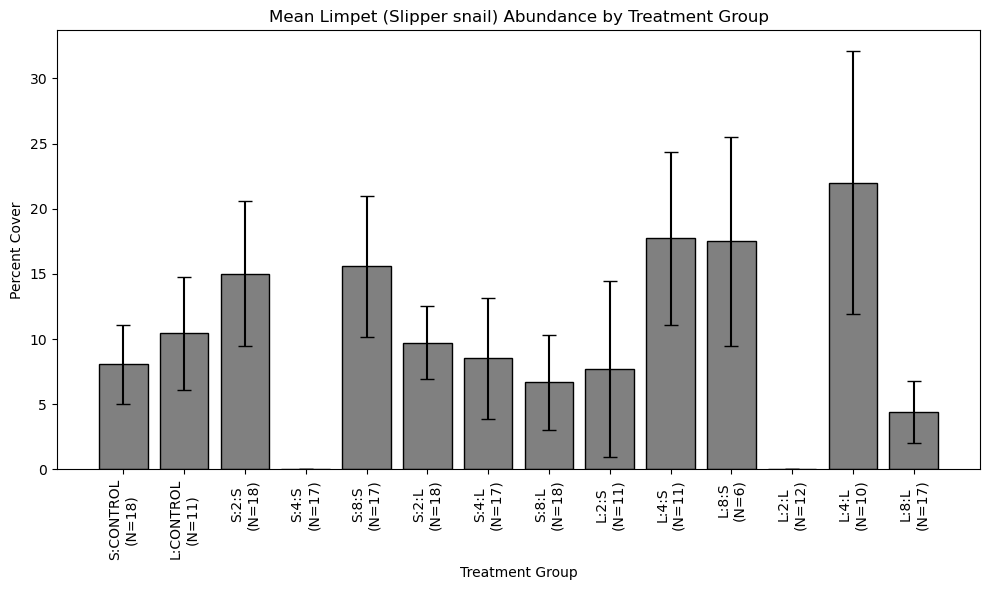

/var/folders/13/zq42zct966b4dh1h5wfdbjh80000gn/T/ipykernel_78271/3475137750.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data['Treatment Group'] = pd.Categorical(column_data['Treatment Group'], categories=custom_order, ordered=True)


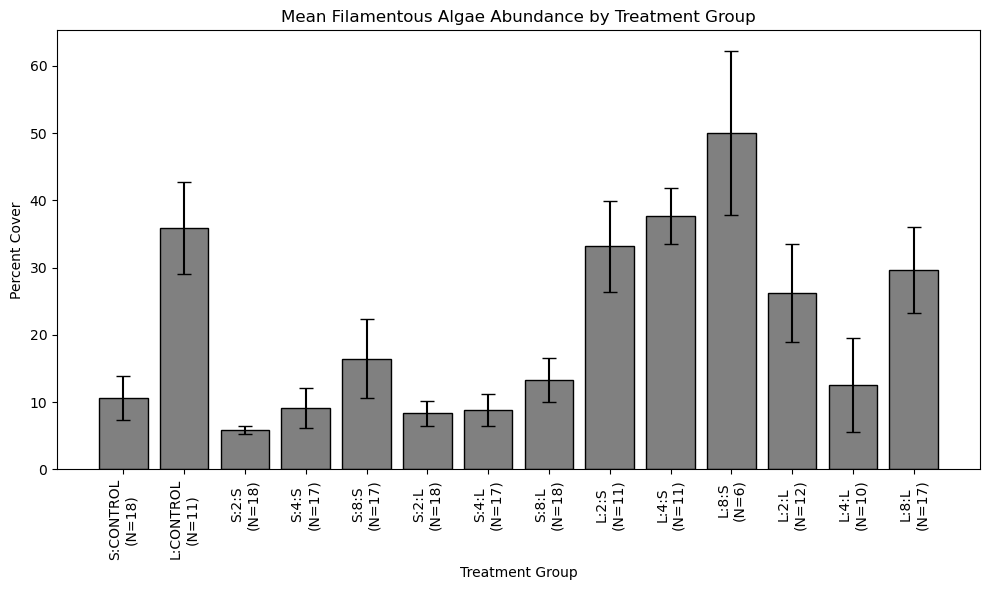

In [20]:
import matplotlib.pyplot as plt

# Load the results from the Excel file
results_df = pd.read_csv('foulinganalysis.csv')

# List of columns to plot
columns_to_plot = ['Barnacle Abundance', 'Mussel Abundance', 'Limpet (Slipper snail) Abundance', 'Filamentous Algae Abundance'
]

# Custom order for treatment groups to make S:CONTROL and L:CONTROL first
custom_order = ['S:CONTROL', 'L:CONTROL', 
                'S:2:S', 'S:4:S', 'S:8:S', 'S:2:L', 'S:4:L', 'S:8:L', 
                'L:2:S', 'L:4:S', 'L:8:S', 'L:2:L', 'L:4:L', 'L:8:L']

# Loop through each column to generate a bar graph
for column in columns_to_plot:
    # Filter the data for the current column
    column_data = results_df[results_df['Column'] == column]
    
    # Ensure that the treatment groups are in the correct order
    column_data['Treatment Group'] = pd.Categorical(column_data['Treatment Group'], categories=custom_order, ordered=True)
    
    # Sort the data by the treatment group order
    column_data = column_data.sort_values('Treatment Group')
    
    # Get the means, standard errors, and treatment groups
    means = column_data['Mean']
    errors = column_data['Standard Error']
    treatment_groups = column_data['Treatment Group']
    
    # Extract N values from the `Sample Size (N)` column
    treatment_counts = column_data.set_index('Treatment Group')['Sample Size (N)']
    
    # Format x-axis labels to include treatment group and N value
    x_labels = [f"{grp}\n(N={int(treatment_counts[grp])})" if grp in treatment_counts else grp for grp in treatment_groups]
    
    # Create the bar plot with error bars
    plt.figure(figsize=(10, 6))  # Set figure size for better readability
    plt.bar(treatment_groups, means, yerr=errors, capsize=5, color='gray', edgecolor='black')
    
    # Add titles and labels
    plt.title(f'Mean {column} by Treatment Group')
    plt.xlabel('Treatment Group')
    plt.ylabel('Percent Cover')
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=90)  # Add custom labels with N-values
    
    # Adjust layout for better spacing
    plt.tight_layout()  
    
    # Save the figure with a unique name based on the column
    plt.savefig(f'{column.replace(" ", "_").replace("-", "_")}_bargraph.png', bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()
    
    # Optionally close the figure after saving to free up memory
    plt.close()
